In [50]:
%pylab inline
from sklearn import datasets               ## load the iris data. 
iris = datasets.load_iris()
X = iris.data 
C = iris.target
X.shape


Populating the interactive namespace from numpy and matplotlib


/Users/xiangli/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(150, 4)

In [51]:
## DEAL WITH DATA
#total = np.matrix()
import os
import glob
path = "./data"
# 894   894    123   23
A1 = np.zeros([1,894])
A2 = np.zeros([1,894])
A3 = np.zeros([1,123])
A4 = np.zeros([1,23])
for filename in glob.glob(os.path.join(path, '*.txt')):
    print (filename)
    with open(filename) as f:
        content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
        content = [x.strip() for x in content]
        mat1 = np.array([float(s) for s in content[0].split(' ')])
        mat2 = np.array([float(s) for s in content[1].split(' ')])
        mat3 = np.array([float(s) for s in content[2].split(' ')])
        mat4 = np.array([float(s) for s in content[3].split(' ')])
        
        A1 = vstack((A1, mat1))
        A2 = vstack((A2, mat2))
        A3 = vstack((A3, mat3))
        A4 = vstack((A4, mat4))
        


./data/filename-Cashew+chicken.txt
./data/filename-Pavlova.txt
./data/filename-bolognese+sauce.txt
./data/filename-ITALIAN+NACHOS.txt
./data/filename-Greek+Salad.txt
./data/filename-dal.txt
./data/filename-Nem+cuon.txt
./data/filename-Veg+Dum+Biryani.txt
./data/filename-pho.txt
./data/filename-Ginger+beef .txt
./data/filename-Mapo+tofu.txt
./data/filename-Pasta+e+fagioli.txt
./data/filename-Caesar+Salad.txt
./data/filename-Bruschetta+de+Flageolets .txt
./data/filename-Spag+bol.txt
./data/filename-Chicken+parmigiana.txt
./data/filename-chicken+Salad.txt
./data/filename-CARBONARA.txt
./data/filename-Lamingtons.txt
./data/filename-Hyd+Dum+Ka+Chicken+Biryani.txt
./data/filename-Torta+de+Acelga.txt
./data/filename-French+Toast.txt
./data/filename-AFFOGATO.txt
./data/filename-General+Zuo+chicken.txt
./data/filename-Chicken+curry.txt
./data/filename-mango+lessi.txt
./data/filename-Pap+en+vleis.txt
./data/filename-Bruschetta.txt
./data/filename-masala.txt
./data/filename-noodle+soup.txt
./data

In [98]:
A1 = A1.reshape([32,894])
A2 = A2.reshape([32,894])
A3 = A3.reshape([32,123])
A4 = A4.reshape([32,23])


In [99]:
# Normalization
avg = mean(A1, axis=0).reshape(1,A1[1,:].size)
A1 -= avg
# sample covariance matrix

In [100]:
X = A1
from sklearn import decomposition
## pca do singular value decomposition, accomplishes dimentionality reduction by only keeping the top 3 e-val.
## it also makes the data less sparse by whitening.
pca = decomposition.PCA(n_components=2, whiten = True)
pca.fit(X) # different convention: row vs col !!!
print (pca.components_.T, pca.explained_variance_)
E= L1 = pca.components_
K = E.T.dot(E).dot(X.T)


[[  1.16584663e-18  -1.34129859e-16]
 [ -2.74155491e-20   6.70655705e-18]
 [ -3.94048990e-20   1.37664563e-18]
 ..., 
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]] [ 0.18874548  0.14086527]


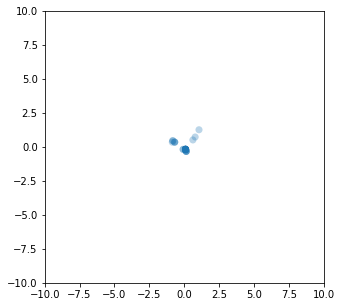

In [55]:
K = E.dot(X.T);
figure(figsize=(5,5)); xlim(-10,10); ylim(-10,10);
scatter(K[0,:],K[1,:],marker='o',s=50,alpha=0.3,edgecolor='none');

In [89]:
avg = mean(A2, axis=0).reshape(1,A2[1,:].size)
X = A2 - avg
from sklearn import decomposition
## pca do singular value decomposition, accomplishes dimentionality reduction by only keeping the top 3 e-val.
## it also makes the data less sparse by whitening.
pca = decomposition.PCA(n_components=4, whiten = True)
pca.fit(X) # different convention: row vs col !!!
print (pca.components_.T, pca.explained_variance_)
E= L2 = pca.components_
K = E.T.dot(E).dot(X.T)
print(E.shape, X.shape)

[[  3.48922980e-18  -7.40224939e-17  -1.03443838e-16  -1.51440276e-17]
 [  1.18975231e-18  -3.20593465e-17   5.79141326e-17   3.39995704e-17]
 [ -3.19884722e-20   4.71650764e-19  -2.14658785e-20   6.06163489e-17]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]] [ 11.34590969   5.65629004   3.05623217   2.52981006]
(4, 894) (32, 894)


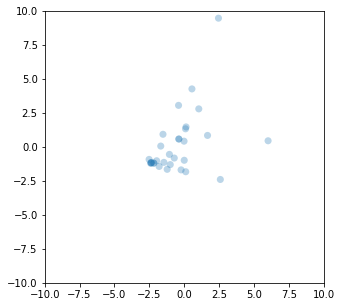

In [64]:
K = E.dot(X.T);
figure(figsize=(5,5)); xlim(-10,10); ylim(-10,10);
scatter(K[0,:],K[1,:],marker='o',s=50,alpha=0.3,edgecolor='none');

In [96]:
avg = mean(A3, axis=0).reshape(1,A3[1,:].size)
X = A3 - avg
from sklearn import decomposition
## pca do singular value decomposition, accomplishes dimentionality reduction by only keeping the top 3 e-val.
## it also makes the data less sparse by whitening.
pca = decomposition.PCA(n_components=4, whiten = True)
pca.fit(X) # different convention: row vs col !!!
print (pca.components_.T, pca.explained_variance_)
E= L3 = pca.components_
K = E.T.dot(E).dot(X.T)

[[  2.74694734e-01  -4.33035862e-01  -2.18454254e-02   3.14580824e-01]
 [  3.76390495e-03   9.00731792e-03   1.95367773e-03  -3.14364600e-03]
 [  3.12694815e-02  -2.71595276e-02  -4.15438962e-02   1.14204137e-01]
 [  4.27018278e-02  -9.41833254e-02  -7.25745948e-02  -2.09309504e-02]
 [  8.22827690e-02  -1.52919370e-03   4.88925523e-03   2.86371587e-01]
 [  8.46985739e-03  -2.59114402e-02  -2.01750163e-03  -7.50648223e-02]
 [  6.30490501e-03   5.30382763e-03  -9.28281086e-04   1.73373247e-03]
 [  4.12884269e-01  -4.05526877e-01   6.51003836e-01  -2.23042700e-01]
 [  1.50099009e-01   8.10377734e-02   1.17693966e-02  -1.43541298e-01]
 [ -1.44255191e-02  -3.30510056e-04   2.67720598e-02  -9.76936445e-04]
 [  1.76358699e-02  -8.13866290e-03  -1.32169304e-02  -7.07238320e-03]
 [  3.96673222e-02  -1.62496385e-02   2.53018987e-02   1.50613797e-02]
 [  5.62264843e-02   2.71125095e-02   5.51785264e-02   1.94645866e-01]
 [ -4.26269050e-17  -2.05738571e-17   3.44620797e-17  -8.82806777e-18]
 [  4.

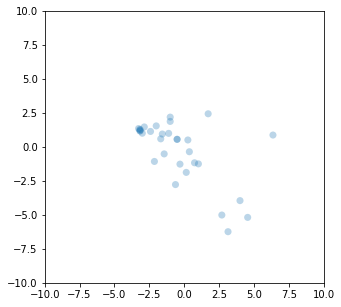

In [66]:
K = E.dot(X.T);
figure(figsize=(5,5)); xlim(-10,10); ylim(-10,10);
scatter(K[0,:],K[1,:],marker='o',s=50,alpha=0.3,edgecolor='none');

In [94]:
avg = mean(A4, axis=0).reshape(1,A4[1,:].size)
X = A4 - avg
from sklearn import decomposition
## pca do singular value decomposition, accomplishes dimentionality reduction by only keeping the top 3 e-val.
## it also makes the data less sparse by whitening.
pca = decomposition.PCA(n_components=5, whiten = True)
pca.fit(X) # different convention: row vs col !!!
print (pca.components_.T, pca.explained_variance_)
E= L4 = pca.components_
K = E.T.dot(E).dot(X.T)

[[  6.02336620e-01  -7.12138371e-01  -3.01943743e-01   4.88013126e-02
   -3.65377211e-03]
 [  3.38351091e-02   1.37075260e-02   6.33105335e-02  -1.10116183e-01
    9.09762826e-02]
 [  7.14688830e-02  -8.83424430e-04   2.28706796e-02   6.57461183e-03
   -1.66531316e-01]
 [  3.98171840e-02  -6.15447241e-02  -3.11024829e-02   3.43563963e-02
   -5.65798249e-02]
 [  2.54380665e-01   3.37255932e-01  -2.40192385e-01  -3.36315510e-01
   -8.45580054e-03]
 [  2.63571700e-02  -3.76169647e-04   2.05513951e-02   8.34338950e-03
    9.83100739e-02]
 [  5.69824568e-01   1.53223572e-01   7.77365422e-01  -3.60319468e-02
   -1.11022146e-01]
 [ -8.52454076e-03  -2.62158961e-02  -2.46344225e-03  -2.06235536e-02
    2.52781376e-02]
 [  7.65034869e-02   5.75543437e-02  -4.52778128e-02  -5.77145123e-02
    2.76382701e-01]
 [  3.05980167e-01   4.12102095e-01  -2.54686725e-01   7.91753423e-01
   -7.59217331e-02]
 [  3.77335493e-04  -9.37117924e-04  -9.61011970e-03  -2.17396503e-02
   -2.74891809e-02]
 [  9.5716

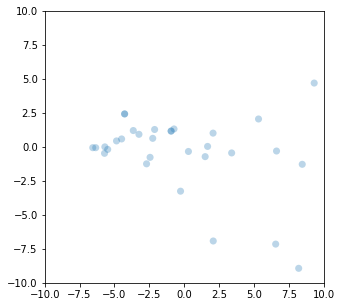

In [92]:
K = E.dot(X.T);
figure(figsize=(5,5)); xlim(-10,10); ylim(-10,10);
scatter(K[0,:],K[1,:],marker='o',s=50,alpha=0.3,edgecolor='none');

In [102]:
print(L1.shape, L2.shape, L3.shape, L4.shape)

(2, 894) (4, 894) (4, 123) (5, 23)


In [105]:
np.savetxt('L1.txt', L1, delimiter=',')
np.savetxt('L2.txt', L2, delimiter=',')
np.savetxt('L3.txt', L3, delimiter=',')
np.savetxt('L4.txt', L4, delimiter=',')

In [106]:
np.savetxt('L1.T.txt', L1.T, delimiter=',')
np.savetxt('L2.T.txt', L2.T, delimiter=',')
np.savetxt('L3.T.txt', L3.T, delimiter=',')
np.savetxt('L4.T.txt', L4.T, delimiter=',')